# Regresi Linier - Satu Luaran, Satu Prediktor

Sumber: An Introduction to Statistical Learning with Applications in R (Springer)

Modul ini akan membahas mengenai metode <i>Machine Learning</i> paling sederhana, yakni regresi linier. Tujuan dari regresi linier adalah untuk mencari hubungan <b>linier</b> antara variabel prediktor (X) dan variabel target (Y). Hubungan ini biasa direpresentasikan dengan persamaan di bawah ini.

\begin{equation}
Y \approx \beta_0 + \beta_1 X
\end{equation}


Jika kita ingin merepresentasikan hubungan antara hubungan penjualan (Sales) sebagai target dan anggaran iklan TV (TV) sebagai prediktor, maka hubungan itu bisa dimodelkan dengan:

\begin{equation}
sales \approx \beta_0 + \beta_1 tv
\end{equation}

Dengan $\beta_0$ dan $\beta_1$ adalah parameter "intercept" dan "kemiringan" pada model linier yang masing-masing nilainya tidak diketahui. Model yang akan kita latih akan memberikan suatu nilai perkiraan $\hat{\beta_0}$ dan $\hat{\beta_1}$ yang digunakan untuk mendekati nilai sebenarnya dari $\beta_0$ dan $\beta_1$. Kedua parameter ini, beserta prediktor, akan bertugas memprediksi nilai target yang belum diketahui.

\begin{equation}
\hat{y} = \hat{\beta_0} + \hat{\beta_1} {x}
\end{equation}


$\hat{y}$ menandakan prediksi dari Y dengan X = $x$. Penggunaan simbol hat ($\hat{ }$) menandakan nilai perkiraan dari koefisien atau target.

## 1. Model Regresi Linier dengan Satu Variabel Prediktor

Contoh data hubungan antara Sales dan TV

| Sales (y) | TV (x) |
|-----------|--------|
| 7         | 0      |
| 7.2       | 1      |
| ...       | ...    |
| 23        | 250    |
| 25        | 278    |
| 24.8      | 245    |

Gambar di bawah ini merupakan model yang terbentuk dengan regresi linier terhadap Sales dan TV. Titik-titik merah menandakan titik data $x_i$ dan $y_i$ yang berasal dari data latih. Garis biru merupakan regresi linier yang didekati untuk mendekati hubungan antara Sales dan TV. Ruas garis abu-abu lurus vertikal menandakan galat atau <i>error</i> dari pendekatan regresi linier terhadap hubungan Sales dan TV.

![Alt Text](img/3. model-sales-tv.JPG)

Kita anggap $\hat{y}_i = \hat{\beta_0} + \hat{\beta_1} {x}_i$ adalah prediksi untuk Y yang mengacu pada X ke-i. Maka $e_i = y_i - \hat{y}_i$ adalah residual ke-i yang menandakan selisih antara nilai perkiraan (nilai prediksi dari model regresi linier) terhadap nilai variabel target sebenarnya.

Tujuan dari regresi linier adalah membuat semua nilai residual ini sekecil mungkin. Semua nilai residual ini direpresentasikan dengan jumlahan kuadran residual (<i> Residual sum of squares</i>) atau RSS, yakni:


\begin{equation}
RSS = \sum_{i=1}^n {e_i^2}
\end{equation}

atau 

\begin{equation}
RSS = \sum_{i=1}^n {(y_i - \hat{\beta_0} - \hat{\beta_1} {x_i})^2}
\end{equation}

dengan $n$ adalah jumlah data yang kita miliki.

Pendekatan Ordinary Least Square (OLS) memilih suatu nilai $\beta_0$ dan $\beta_1$ agar nilai RSS minimal dapat dicapai. Dengan penurunan kalkulus sederhana, nilai $\beta_0$ dan $\beta_1$ yang dapat membuat nilai RSS minimal adalah

\begin{equation}
\hat{\beta_1} = \frac{\sum_{i=1}^n {(x_i - \bar{x})(y_i - \bar{y})}}{\sum_{i=1}^n {(x_i - \bar{x})^2}} \\
\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}
\end{equation}
dengan $\bar{y}$ dan $\bar{x}$ masing-masing adalah nilai rerata dari Y dan X.

Hubungan antara RSS dan $\beta_0$ dan $\beta_1$ untuk kasus Sales vs TV dapat dilihat di gambar di bawah ini. Tugas dari Ordinary Least Square adalah mendekati nilai yang berada di titik minimum RSS (titik merah).
![Alt Text](img/3. RSS-b0-b1-sales-tv.JPG)

### Mengukur Performa dari Regresi Linier terhadap Data Latih/Data Uji

Pada dasarnya, kita menggunakan data latih sebagai dasar untuk pembuatan model, termasuk regresi linier. Kemudian, untuk menguji apakah model yang kita buat itu baik, kita akan menerapkan model tersebut terhadap data uji (data dengan Y yang tidak diketahui).

Dengan adanya data latih (<i>training dataset</i>) dan data uji (<i>test dataset</i>), kita akan memiliki 2 macam RSS, yakni $RSS_{train}$ untuk data latih dan $RSS_{test}$ untuk data uji. Sejatinya, Y di data uji tidak diketahui, namun dalam konteks eksperimen Y di data uji diketahui namun dianggap seolah-olah tidak ada ketika prediksi. $RSS_{test}$ akan dianggap baik jika nilainya semakin kecil. Hanya saja, untuk regresi linier OLS dengan satu variabel, tidak begitu banyak yang bisa dikerjakan untuk melihat pola perubahan $RSS_{test}$ karena regresi linier OLS dengan satu variabel termasuk model non-parametrik. Model non-parametrik memiliki makna model tersebut tidak bergantung pada parameter tertentu yang mempengaruhi performanya. Dengan konsep ini juga, regresi linier OLS satu variabel disebut tidak fleksibel.

------------------------------------------------ 

### Latihan 1: Menggunakan Regresi Linier OLS Satu Variabel di Python

Untuk latihan kali ini, kita akan menggunakan regresi linear Ordinary Least Square dalam pustaka sklearn.linear_model untuk kasus pemberian harga rumah di Portland. Variabel prediktornya adalah ukuran rumah (size) dan jumlah kamar tidur (bedroom).


Sumber contoh: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [1]:
#impor pustaka-pustaka yang terkait untuk menyelesaikan tugas ini
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

##### Tugas 1: Tampilkan dataset pricing house Portland

In [3]:
#load dataset portland dari folder "Data\Regression\House Price Portland" dengan nama file "data.csv" menggunakan pandas
data = pd.read_csv("Data/Regression/House Price Portland/data.csv")

#Tampilkan shape dari data (isi di sini)
print(data.shape)

(47, 3)


In [4]:
#Tampilkan data sebagai dataframe, cukup 5 baris pertama
data.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


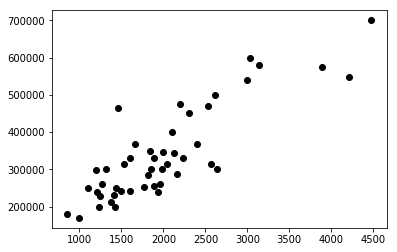

In [8]:
#Plot keseluruhan data dari pricing house Portland dalam format 2 dimensi dengan Y adalah price dan X1 adalah 
#...size dengan scatter plot
X1 = data['size']
Y = data['price']
plt.scatter(X1, Y,  color='black')

plt.show()

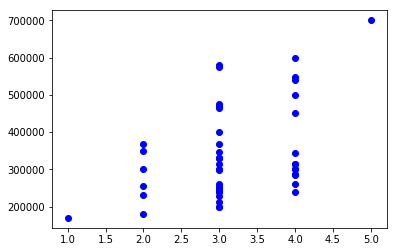

In [9]:
#Lakukan plot yang sama dengan X2 adalah bedroom
X2 = data['bedroom']
Y = data['price']
plt.scatter(X2, Y,  color='blue')

plt.show()

Kita akan mencoba membagi dataset ini menjadi data latih dan data uji. Kita ambil sepuluh data terakhir sebagai data uji dan sisanya sebagai data latih. Gunakan variabel Y_train dan Y_test sebagai penampung variabel target (price) untuk data latih dan data uji, berikut X1_train dan X1_test untuk variabel prediktor 1 (size) dan X2_train dan X2_test untuk variabel prediktor 2 (bedroom)

In [13]:
Y_train = data.iloc[:-10,2]
Y_test = data.iloc[-10:,2]

#Silakan gunakan teknik slicing dengan konsep yang sama untuk mengambil X1_train, X1_test, X2_train, dan X2_test dari data
X1_train = data.iloc[:-10,0]
X2_train = data.iloc[:-10,1]
X1_test = data.iloc[-10:,0]
X2_test = data.iloc[-10:,1]

#Untuk menghindari galat di syntax berikutnya, kita akan ubah dimensi semua prediktor menjadi 2 dimensi. 
#Membangun model regresi linier membutuhkan X sebagai array 2 dimensi
X1_train = X1_train.values.reshape(-1,1)
X2_train = X2_train.values.reshape(-1,1)
X1_test = X1_test.values.reshape(-1,1)
X2_test = X2_test.values.reshape(-1,1)

In [15]:
print(X1_train.shape)
print(X1_test.shape)

(37, 1)
(10, 1)


Kita akan membuat regresi linier dengan OLS dengan bantuan pustaka scikit-learn.linear_model yang sudah diimpor sebelumnya. Untuk kali ini, kita akan mencoba menggunakan X1 saja sebagai prediktor. Kita akan namai model linier ini dengan "linreg1". Berikut adalah cara untuk melatih model "linreg1".

In [16]:
# Create linear regression object
linreg1 = linear_model.LinearRegression()

#Karena kita hanya menggunakan 1 variabel saja, maka dimensi yang terbentuk dari 

# Train the model using the training sets
linreg1.fit(X1_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Kita akan memeriksa koefisien dari variabel prediktor dan interceptnya

In [17]:
print("Coefficient: %.3lf " % (linreg1.coef_))
print("Intercept: %.3lf " % (linreg1.intercept_))

Coefficient: 151.345 
Intercept: 43140.763 


Lalu, kita akan lihat bagaimana performa model "linreg1" terhadap data uji. Metrik performa yang digunakan di sini (yang tersedia di pustaka scikit learn) bukan RSS sebagaimana disebut sebelumnya. Metrik yang digunakan adalah Mean Squared Error (MSE) dan dapat dibilang sama dengan rata-rata dari RSS, MSE dinyatakan dengan:
\begin{equation}
MSE = \frac{1}{n} \sum{(y_i - \hat{y}_i)^2}
\end{equation}

In [65]:
#Prediksi price terhadap size dari rumah
Y_pred = linreg1.predict(X1_test)

# Mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))

Mean squared error: 5309481303.48


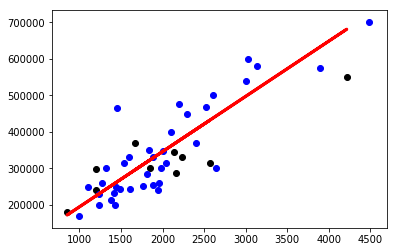

In [66]:
plt.scatter(X1_test, Y_test,  color='black')
plt.scatter(X1_train, Y_train,  color='blue')
plt.plot(X1_test, Y_pred, color='red', linewidth=3)

plt.show()

Dengan cara yang sama, buatlah model "linreg2" yang memanfaatkan variabel jumlah kamar tidur untuk menentukan harga rumah. Latihlah model tersebut, periksa koefisien dan interceptnya, serta gunakan untuk memprediksi data uji berdasarkan jumlah kamar tidur. Lalu, hitung MSE-nya dan plot grafnya.

Coefficient: 82882.465 
Intercept: 85765.649 
Mean squared error: 9309702463.05


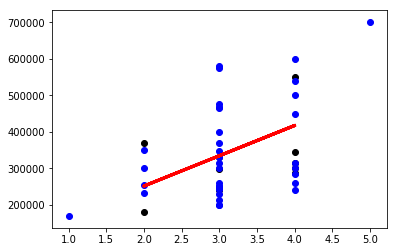

In [19]:
linreg2 = linear_model.LinearRegression()
linreg2.fit(X2_train,Y_train)
print("Coefficient: %.3lf " % (linreg2.coef_))
print("Intercept: %.3lf " % (linreg2.intercept_))
Y_pred2 = linreg2.predict(X2_test)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred2))

plt.scatter(X2_test, Y_test,  color='black')
plt.scatter(X2_train, Y_train,  color='blue')
plt.plot(X2_test, Y_pred2, color='red', linewidth=3)

plt.show()

Yang manakah yang lebih baik sebagai prediktor? Apakah luas rumah atau jumlah kamar tidur?

Jawaban: